# Engineering Data Analysis

> **Mohamad M. Hallal, PhD** <br> Teaching Professor, UC Berkeley

[![License](https://img.shields.io/badge/license-CC%20BY--NC--ND%204.0-blue)](https://creativecommons.org/licenses/by-nc-nd/4.0/)
***

# Lognormal Distribution

In this notebook, we will explore a common continuous distribution known as the lognormal distribution. The lognormal distribution is used for modeling various natural phenomena such as income, amount of rainfall, length of chess games, stock prices, and many others. Due to its mathematical nature, the lognormal distribution can be confusing. So, we'll try to break it down to understand its properties, parameters, and its relation to the normal distribution. 

Let's get started!

## Basic Properties

At this stage, you're likely familiar with the normal distribution. 

<div class="alert alert-block alert-warning"> <b>DISCUSS!</b> What are some of the properties of the normal distribution? Specifically: <br> <b>Is it skewed left, symmetric, or skewed right?</b> 
    <br> <b>What is the range of values of a normal distribution?</b>
    <br> <b>What are the key parameters that define a normal distribution?</b>
    <br> <b>How are the mean and median related?</b></div> 

You can think of the lognormal distribution as a close relative of the normal distribution. It is related to the normal distribution but with some modifications.

<div class="alert alert-block alert-warning"> <b>DISCUSS!</b> We mentioned above that various natural phenomena generally follow a lognormal distribution. What are some properties of these examples (income, amount of rainfall, length of a chess game, stock prices)? Specifically: <br> <b>Do you expect these datasets to be skewed left, symmetric, or skewed right?</b> 
    <br> <b>What is the range of values of these examples? Can they take negative values?</b></div> 
    
Let's explore an actual dataset to better answer these questions and understand key properties of lognormal distributions.

## Dataset

We will investigate NVIDIA's historical stock price dataset, specifically, the daily trading volume. 

> In capital markets, volume, or trading volume, is the amount of a security that was traded during a given period of time. In the context of a single stock trading on a stock exchange, the volume is commonly reported as the number of shares that changed hands during a given day. [Source](https://en.wikipedia.org/wiki/Volume_(finance))

Let's load the provided data set `NVDA.csv`. These are all the features:

| Feature  | Units | Description                            |
| :-       | :-    | :-                                     |
| Date     |       | Day of the year                        |
| Open     | \$    | Opening price of the stock that day    |
| High     | \$    | Highest price of the stock that day    |
| Low      | \$    | Lowest price of the stock that day     |
| Close    | \$    | Closing price of the stock that day    |
| Volume   |       | Total number of shared traded that day |

Run the cell below, which reads the data and saves it as a variable named `data` and then extracts the trading volume and saves it as a variable named `Volume`.

In [2]:
import pandas as pd

# Load dataset
data = pd.read_csv('resources/NVDA.csv')

# extract volume data
Volume = data['Volume']

# Display the first few rows of the data using the head() method
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2000,0.098437,0.099219,0.091927,0.097526,300912000
1,1/4/2000,0.095833,0.096094,0.090104,0.094922,300480000
2,1/5/2000,0.092188,0.093750,0.090495,0.091797,188352000
3,1/6/2000,0.091797,0.091797,0.082292,0.085807,120480000
4,1/7/2000,0.085417,0.088151,0.084115,0.087240,71184000


Let's first visually examine the distribution of the trading volume. Note that the data has been extracted and saved as variable `Volume`.

<div class="alert alert-block alert-info"> <b>YOUR TURN!</b> Compute the mean and the median of the trading volume.</div>

*Hint: Recall that you can compute descriptive statistics using methods such as `DataFrame.mean()` and `DataFrame.median()`, where `DataFrame` should be replaced with the name of your dataset (`Volume` in this case).*

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# compute mean and median of Volume
mean = Volume.mean()
median = Volume.median()

print(f'Mean:   {mean:.2e}')
print(f'Median: {median:.2e}')

Mean:   6.19e+08
Median: 5.17e+08


Below, we have provided you with a code to plot the mean and median as vertical lines.

<div class="alert alert-block alert-info"> <b>YOUR TURN!</b> Modify the code to create a histogram of the trading volume using 80 bins.</div>

*Hint: Recall that you can create a histogram using `plt.hist(data, bins=...)`, where `data` should be replaced by the name of your dataset (`Volume` in this case).*

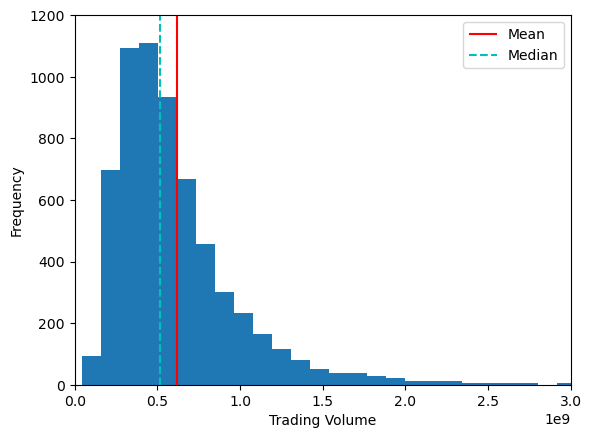

In [6]:
# plot the mean and median as vertical lines
plt.vlines(mean, 0, 1200, color='r', label='Mean')
plt.vlines(median, 0, 1200, color='c', ls='--', label='Median')

# add legend
plt.legend()

# plot the histogram
plt.hist(Volume, bins=80)

# label the axes
plt.ylabel('Frequency')
plt.xlabel('Trading Volume')

# control axes limits
plt.xlim(0, 3*10**9)
plt.ylim(0, 1200)

plt.show()

<div class="alert alert-block alert-warning"> <b>DISCUSS!</b> What do you observe from the plot above? Specifically: <br> <b>What is the range of values of this dataset?</b> 
    <br> <b>Is it skewed left, symmetric, or skewed right?</b>
    <br> <b>How does the mean relate to the median?</b></div>
    
The trading volume dataset follows a lognormal distribution, so your answers to the above questions are general properties of the lognormal distribution. Specifically, the lognormal distribution describes data that:
1. Can only take positive values $(0, +\infty)$
2. Are skewed right

## Relation to Normal Distribution

The name **log**normal reveals that it relates to logarithms as well as the normal distribution. So let's explore this relation.

We will transform the volume trading dataset and see if we obtain one of the common distributions that we already encountered. 

Specifically, let's take the natural logarithm of the volume trading dataset and check its distribution.

The code below computes the natural logarithm of the volume trading dataset and saves it as variable `log_Volume`. Then, the code computes the mean and the median of `log_Volume`.

In [8]:
# compute natural log of Volume
log_Volume = np.log(Volume)

# compute mean and median of log(Volume)
log_mean = log_Volume.mean()
log_median = log_Volume.median()

print(f'Mean of log(Volume):   {log_mean:.2e}')
print(f'Median of log(Volume): {log_median:.2e}')

Mean of log(Volume):   2.01e+01
Median of log(Volume): 2.01e+01


Below, we have provided you with a code to plot the mean and median of `log_Volume` as vertical lines.

<div class="alert alert-block alert-info"> <b>YOUR TURN!</b> Modify the code to create a histogram of <code>log_Volume</code> using 23 bins.</div>

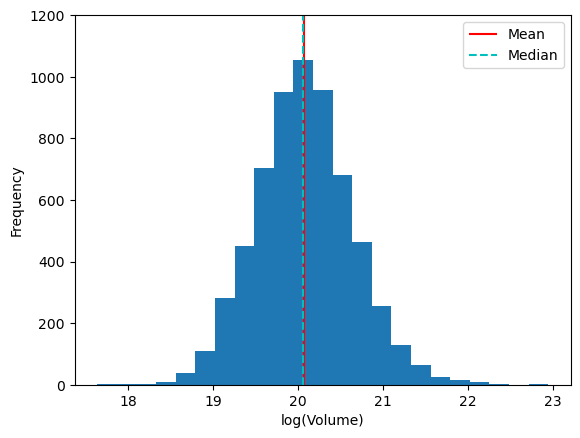

In [10]:
# plot the mean and median as vertical lines
plt.vlines(log_mean, 0, 1200, color='r', label='Mean')
plt.vlines(log_median, 0, 1200, color='c', ls='--', label='Median')

# add legend
plt.legend()

# plot the histogram
plt.hist(log_Volume, bins=23)

# label the axes
plt.xlabel('log(Volume)')
plt.ylabel('Frequency')

# control axes
plt.ylim((0, 1200))

plt.show()

<div class="alert alert-block alert-warning"> <b>DISCUSS!</b> What do you observe from the plot above? Specifically: <br> <b>Is the log(Volume) dataset skewed left, symmetric, or skewed right?</b>
    <br> <b>How does the mean relate to the median of log(Volume)?</b>
    <br> <b>Does this look like one of the common distributions that we already discussed?</b></div>
    
We previously mentioned that the trading volume dataset follows a lognormal distribution.

<div class="alert alert-block alert-warning"> <b>DISCUSS!</b> Based on the above observations, continue the following statement: <br> <b>If $X$ follows a lognormal distribution, then $Y=\log(X)$ follows a ______ distribution.</b></div>

## Parameters

The probability density function of the lognormal distribution is given by:

$$f(x; \mu, \sigma) = \frac{1}{x\sigma\sqrt{2\pi}} \exp\left(-\frac{(\log x - \mu)^2}{2\sigma^2}\right) \quad \text{for } x > 0$$

As you can see, the lognormal distribution has two parameters, $\mu$ and $\sigma$. We generally use $\mu$ and $\sigma$ to represent the mean and standard deviation of a dataset, respectively. However, these parameters might not be what you expect. So let's try to find out what are the parameters of the lognormal distribution.

Below, we have provided you with a function that computes the PDF of the lognormal distribution based on the equation above. **Run the cell below to define the function.** Do not modify the cell, only run it.

In [12]:
lognorm = lambda x, mu, sigma: 1/(x*sigma*np.sqrt(2*np.pi)) * np.exp(-(np.log(x)-mu)**2/(2*sigma**2))

Next, we'll try to plot the density histogram of the trading volume data and the PDF of the lognormal distribution to see which parameters give a PDF that matches the density histogram.

We have already provided you with the entire code. The code does the following:
1. Plots the PDF of the lognormal distribution using the mean and standard deviation of `Volume` as parameters
2. Plots the PDF of the lognormal distribution using the mean and standard deviation of `log_Volume` as parameters
   
<div class="alert alert-block alert-warning"> <b>DISCUSS!</b> After running the code cell below, which $\mu$ and $\sigma$ values provide a better fit for the lognormal distribution? What does this tell you about the parameters of the lognormal distribution? Are they the mean and the standard deviation of the random variable? Or are they the mean and standard deviation of its logarithm?</div>

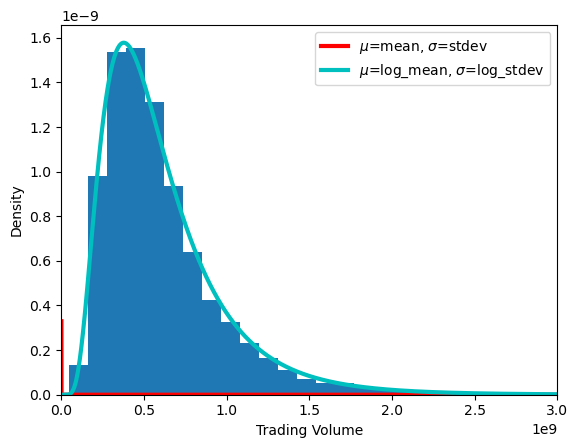

In [14]:
# compute mean and stdev of Volume
mean = Volume.mean()
stdev = Volume.std()

# compute mean and stdev of log(Volume)
log_mean = log_Volume.mean()
log_stdev = log_Volume.std()

# plot density histogram of Volume data
plt.hist(Volume, bins=80, density=True)

# compute PDF
x = np.arange(1,3*10**9,10**3)
density1 = lognorm(x, mu=mean, sigma=stdev)
density2 = lognorm(x, mu=log_mean, sigma=log_stdev)

# plot theoretical density function
plt.plot(x, density1, c='r', label=r'$\mu$=mean, $\sigma$=stdev', lw=3)
plt.plot(x, density2, c='c', label=r'$\mu$=log_mean, $\sigma$=log_stdev', lw=3)

# add legend
plt.legend()

# label axes
plt.xlabel('Trading Volume')
plt.ylabel('Density')

# control axes
plt.xlim((0,3*10**9))

plt.show()